In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
sal = pd.read_csv('merged_cbsa_salary.csv')

In [31]:
# eliminate rows with missing Y values (NaN)
# eliminate rows with missing income/zip data (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
#sal['missingMedian'] = pd.isnull(sal['median'])
sal2 = sal[(sal.missingSalary == False)]

sal2.head(5)

,Unnamed: 0,zip,function,sup1,sup2,sup3,sup4,sup5,salary,gender,...,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.With.Medicare.and.Medicaid.means.tested.public.coverage,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.private.only.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.public.only.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..With.two.or.more.types.of.health.insurance.coverage.Other.coverage.combinations,Types.of.Health.Insurance.Coverage.by.Age..65.years.and.over..No.health.insurance.coverage,married,divorced,bad_english,poverty,missingSalary
0,1,1003,position1,4,4,0,0,0,77308,M,...,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532,False
1,2,1003,position15,0,2,0,60,0,38120,M,...,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532,False
2,3,1003,position15,1,0,0,60,2,55335,W,...,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532,False
3,4,1003,position4,1,0,0,35,1,70863,W,...,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532,False
4,5,1003,position9,1,0,0,100,0,56557,M,...,9442,0,1289,18508,194,42.023943,10.485747,7.930932,16.801532,False


In [32]:
sal2.mean()

Unnamed: 0                                                                                                                                                                      1107.377117
zip                                                                                                                                                                            56554.658581
sup1                                                                                                                                                                               1.445767
sup2                                                                                                                                                                               0.774828
sup3                                                                                                                                                                               0.633867
sup4                                                        

In [33]:
# eliminate rows with missing Y values (NaN)
#sal['missingSalary'] = pd.isnull(sal['salary'])
#sal['missingMean'] = pd.isnull(sal['mean'])
#sal2 = sal[(sal.missingSalary == False) & (sal.missingMean == False)]


In [34]:
# list of X vars to include
X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsinposition', 
         'yearsinprofession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instbudget', 'instsize',
        'total_population','Median_Household_Income','poverty','at_least_bach','hispanic','white','black','native_american',
        'asian_api','male_unemployment','female_unemployment','snap','renter','owner','median_rent','full_time','part_time',
        'high_rent_burden','extreme_rent_burden','foreign_born','US_born','adults_same_home','child_same_home']
X_numeric = sal2[X_numeric_features]
X_categorical_features = ['function', 'gender', 'race', 'highestdegree', 'category', 'insttype','city','state']
X_categorical = sal2[X_categorical_features]

In [35]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

Function_dummies = pd.get_dummies(X_categorical['function'])
gender_dummies = pd.get_dummies(X_categorical['gender'])
race_dummies = pd.get_dummies(X_categorical['race'])
highestDegree_dummies = pd.get_dummies(X_categorical['highestdegree'])
Category_dummies = pd.get_dummies(X_categorical['category'])
instType_dummies = pd.get_dummies(X_categorical['insttype'])

X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# convert to ndarray
X_dummy_features = X_dummy_features.as_matrix()

In [36]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html
# default is imputing the mean
from sklearn.preprocessing import Imputer
imp = Imputer(strategy="most_frequent")
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [37]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [38]:
# y is salary
y = sal2.iloc[:, 8].values
#y = np.sqrt(y_all)

In [39]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [40]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08
# best residual sum of squares from first try Ridge Best 
var_to_graph['first_RIDGE'] = 97978320.56
#best resiudal sum of squares with Ridge alpha of 200
var_to_graph['second_RIDGE'] = 93950804.80
#best residual sum of squares with Polynomial Lasso alpha of 100
var_to_graph['poly_lasso'] = 92771351.24
#best residual sum of squares with Lasso alpha of 16
# with maximum number of vars.
var_to_graph['linear_lasso'] = 90363780.20
#final lasso
var_to_graph['linear_lasso'] = 90363780.20

In [41]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 33390.0498421
Coefficients: 
 [  1.10657753e+04   8.65001178e+02  -2.25491663e+03  -1.37891097e+03
   1.81269552e+03   4.52643074e+03  -1.51268258e+03  -2.21573760e+03
  -0.00000000e+00   0.00000000e+00   1.33051236e+03   2.73261721e+03
  -2.69241710e+03  -3.18872664e+03  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00  -4.91135364e+03  -0.00000000e+00  -1.11581199e+03
   0.00000000e+00   5.00032525e+03  -5.82138222e+02   8.30595233e+02
  -1.24388081e+03   0.00000000e+00  -0.00000000e+00  -2.45616282e+03
   0.00000000e+00  -1.39210130e+03  -1.43268015e+03   9.83868804e+02
  -0.00000000e+00   1.05080643e+03  -2.04146973e+03   1.90873861e+03
   0.00000000e+00  -1.54475079e+03  -0.00000000e+00   1.08491946e+04
   4.15217945e+03  -7.16287691e+03   0.00000000e+00  -0.00000000e+00
   2.57542320e+03   0.00000000e+00   1.78764363e+03   5.32656934e+02
   1.68364498e+01  -3.42927697e+00   2.73488863e+01   1.35200443e+02
   7.74836166e+01   3.81208127e+02   1.92149860e+02   3.4175

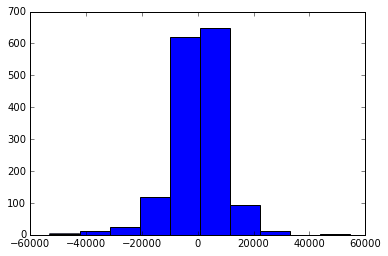

Distribution of prediction error on test data:


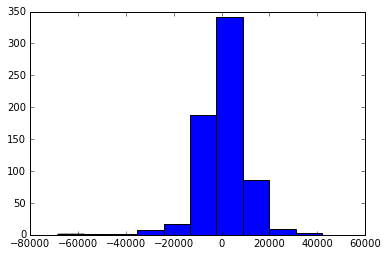

In [42]:
#Lasso Regression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

#BEST LASSO ALPHA IS 16
regr = linear_model.Lasso(alpha=16, max_iter=30000)
#BEST RIDGE IS APHLA=10
#regr = linear_model.Ridge(alpha=15, max_iter=30000)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Mean Squared Error, training data: %d"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Mean Squared Error, test data: %d"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
print(30 * '* ')

# Variance score
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
print('Variance score, test data: %.2f' % regr.score(X_test, y_test))
print(30 * '* ')
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()